In [1]:
library(ggplot2)
library(tidyverse)
library(Hmisc)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.5
✔ tidyr   0.8.2     ✔ dplyr   0.7.8
✔ readr   1.3.1     ✔ stringr 1.3.1
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units



In [2]:
#Input data
idd <- "184_pkd8eTeIAkSTjZUV3T5Zrn5EhvmqM" ## for FCHI daily
datad <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", idd)) ##FCHI daily
nind <- 250 ##FCHI daily, 250 days per year

In [3]:
## Overview of first rows
head(datad)

Date,Open,High,Low,Close,Adj.Close,Volume
02/01/1998,3012,3048,3005.800049,3038.699951,3038.699951,0
05/01/1998,3023.399902,3075.300049,3023.399902,3072.800049,3072.800049,0
06/01/1998,3055.100098,3055.100098,3025.199951,3037.699951,3037.699951,0
07/01/1998,3012.800049,3062.199951,3006.699951,3006.699951,3006.699951,0
08/01/1998,3035,3036,2949.699951,2954.899902,2954.899902,0
09/01/1998,2933.300049,2941.600098,2902.100098,2919.800049,2919.800049,0


In [4]:
# Data Manipulation
#Reformat dates and price 
datad$Date <- as.Date(datad$Date, "%d/%m/%Y")
head(datad)

Date,Open,High,Low,Close,Adj.Close,Volume
1998-01-02,3012,3048,3005.800049,3038.699951,3038.699951,0
1998-01-05,3023.399902,3075.300049,3023.399902,3072.800049,3072.800049,0
1998-01-06,3055.100098,3055.100098,3025.199951,3037.699951,3037.699951,0
1998-01-07,3012.800049,3062.199951,3006.699951,3006.699951,3006.699951,0
1998-01-08,3035,3036,2949.699951,2954.899902,2954.899902,0
1998-01-09,2933.300049,2941.600098,2902.100098,2919.800049,2919.800049,0


In [5]:
#convert to date
datad$Close  <- suppressWarnings(as.numeric(as.character(datad$Close)))

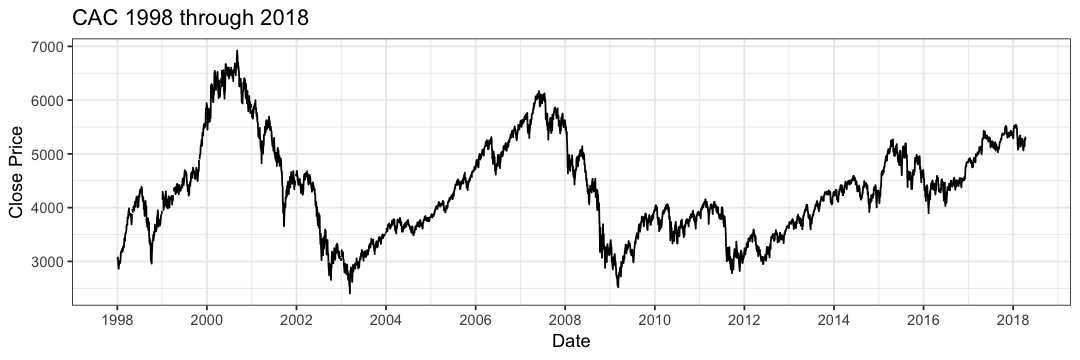

In [6]:
#Plot the data
options(repr.plot.width = 9, repr.plot.height = 3) #set up ploting size

theme_set(theme_bw(base_size=11))
datad %>%
  ggplot(aes(Date, Close)) +
  geom_line() +
  scale_x_date(date_breaks = "2 year", date_labels = "%Y") +
  labs(x = "Date", y = "Close Price", 
       title = "CAC 1998 through 2018")

In [7]:
#Pick the sepecific Period
datad <- subset(datad, Date> "2011-12-31")
str(datad)

'data.frame':	1602 obs. of  7 variables:
 $ Date     : Date, format: "2012-01-02" "2012-01-03" ...
 $ Open     : Factor w/ 5120 levels "2453.050049",..: 440 578 576 515 436 418 432 531 541 570 ...
 $ High     : Factor w/ 5127 levels "2518.290039",..: 499 550 539 447 423 372 493 532 563 543 ...
 $ Low      : Factor w/ 5122 levels "2401.149902",..: 522 586 578 482 464 441 513 564 581 508 ...
 $ Close    : num  3222 3245 3194 3145 3137 ...
 $ Adj.Close: Factor w/ 5127 levels "2403.040039",..: 569 602 519 421 406 390 544 536 533 526 ...
 $ Volume   : Factor w/ 3441 levels "0","100028400",..: 2764 805 493 712 174 3327 1447 1748 1716 1491 ...


In [8]:
#showed null values
datanull <- datad[datad$Open == "null",]
head(datanull)

,Date,Open,High,Low,Close,Adj.Close,Volume
4214,2014-05-01,null,null,null,NA,null,null


In [9]:
# Data Manipulation
# remove null
datad <- datad[datad$Open != "null",]
str(datad)

'data.frame':	1601 obs. of  7 variables:
 $ Date     : Date, format: "2012-01-02" "2012-01-03" ...
 $ Open     : Factor w/ 5120 levels "2453.050049",..: 440 578 576 515 436 418 432 531 541 570 ...
 $ High     : Factor w/ 5127 levels "2518.290039",..: 499 550 539 447 423 372 493 532 563 543 ...
 $ Low      : Factor w/ 5122 levels "2401.149902",..: 522 586 578 482 464 441 513 564 581 508 ...
 $ Close    : num  3222 3245 3194 3145 3137 ...
 $ Adj.Close: Factor w/ 5127 levels "2403.040039",..: 569 602 519 421 406 390 544 536 533 526 ...
 $ Volume   : Factor w/ 3441 levels "0","100028400",..: 2764 805 493 712 174 3327 1447 1748 1716 1491 ...


In [10]:
#summary data for review on plotting especial Close values
describe(datad$Open)
describe(datad$Close)

datad$Open 
       n  missing distinct 
    1601        0     1594 

lowest : 2928.909912 2972.310059 2980.860107 2997.189941 3006.379883
highest: 5521.75     5524.379883 5532.850098 5534.140137 5563.560059

datad$Close 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1601        0     1597        1     4386    727.6     3240     3435 
     .25      .50      .75      .90      .95 
    3982     4401     4911     5254     5353 

lowest : 2950.47 2954.49 2986.10 3003.27 3008.00
highest: 5523.94 5526.51 5529.15 5535.26 5541.99

In [11]:
detach("package:Hmisc", unload=TRUE)

In [12]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



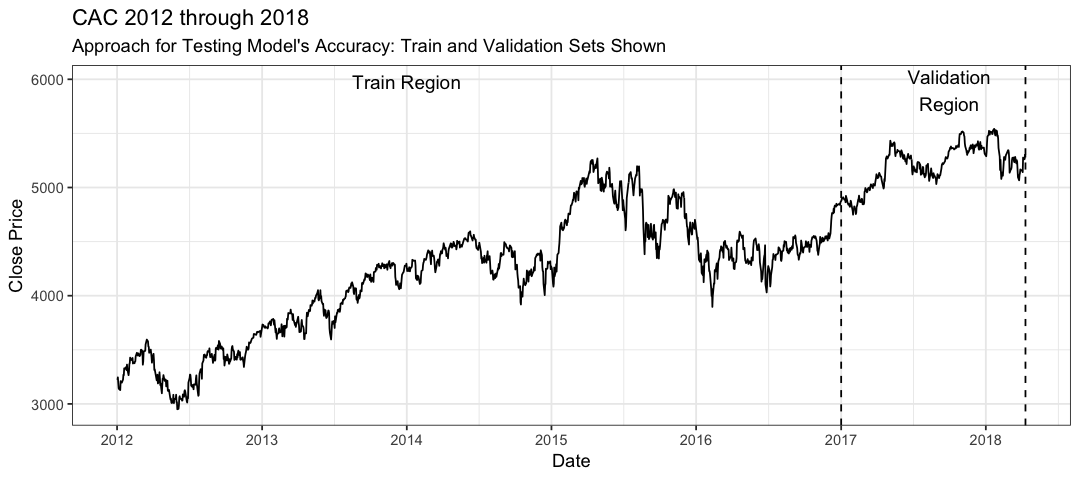

In [13]:
#Plot the data
options(repr.plot.width = 9, repr.plot.height = 4) #set up ploting size

theme_set(theme_bw(base_size=11))
datad %>%
  ggplot(aes(Date, Close)) +
  
  annotate("text", x = ymd("2014-01-01"), y = 5980, label = "Train Region", size=4) +
  
  geom_rect(xmin = as.numeric(ymd("2017-01-01")), 
            xmax = as.numeric(ymd("2018-04-11")),
            ymin = 0, ymax = Inf, alpha = 0.005,
            fill = NA) + 
            geom_vline(aes(xintercept=as.numeric(ymd("2017-01-01"))), color="black", linetype="dashed") +
            geom_vline(aes(xintercept=as.numeric(ymd("2018-04-11"))), color="black", linetype="dashed") +
  annotate("text", x = ymd("2017-10-01"), y = 5900, label = "Validation\nRegion", size=4) +
  geom_line() +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  labs(x = "Date", y = "Close Price", 
       title = "CAC 2012 through 2018",
       subtitle = "Approach for Testing Model's Accuracy: Train and Validation Sets Shown")

In [14]:
library(forecast)

In [15]:
# Create Time Series Object & Plot
# Trainning table and Validation Table
datadtr <- subset(datad, Date > "2012-01-01" & Date < "2017-01-01") #Trainning table
datadval <- subset(datad, Date > "2017-01-01" & Date < "2018-04-12") #Validation table

#Timeseries Object, I picked the freq=255
serie  <-  ts(datad$Close,start=c(2012, 01, 01),freq=255) #ts of full
serie_cln  <-  tsclean(serie) #remove outlier

serietrain <- window(serie, end=c(2016,256)) #ts of training table
serieval <- window(serie, start=c(2017,01)) #ts of validation table

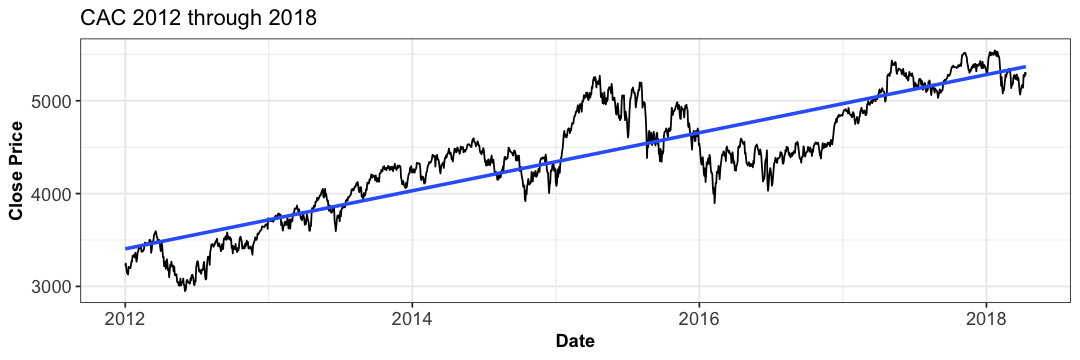

In [16]:
#log of the price
# This will fit in a line
options(repr.plot.width = 9, repr.plot.height = 3)
(serie) %>% 
        autoplot +
        geom_smooth(method = "lm", se = FALSE,lty=1)+
        theme_bw(base_size=11)+
        theme(axis.text=element_text(size=11),
              axis.title=element_text(size=11,face="bold"))+
        labs(x = "Date", y = "Close Price",title = "CAC 2012 through 2018")

In [17]:
# Maybe here it's better to observe the statistical moving average
# (can be displayed in several plot for the report, since it will be in Black&White)
serie_ma7 = ma(serie, order=5)
serie_ma30 = ma(serie, order=21)
serie_ma256 = ma(serie, order=256)

Warning message:
“Removed 4 rows containing missing values (geom_path).”

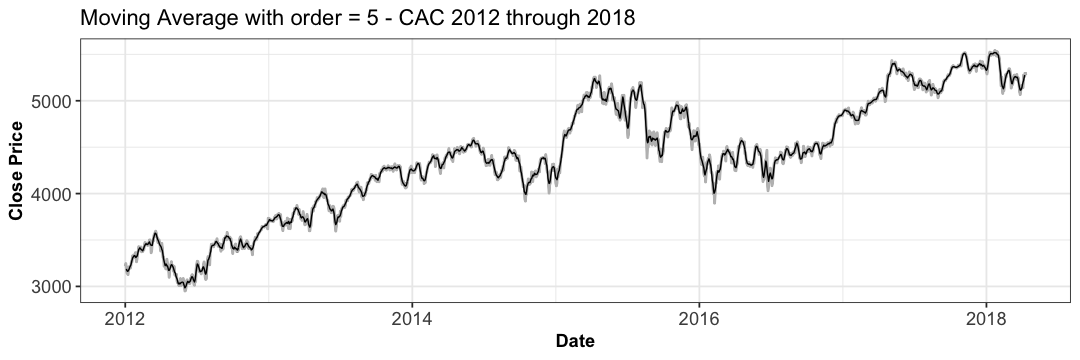

In [18]:
options(repr.plot.width = 9, repr.plot.height = 3)
serie %>% 
        autoplot(col='grey') +
        geom_line(data=serie,col="grey",size=0.8)+
        geom_line(data=serie_ma7,col='black',lty=1,size=0.4)+
        theme_bw(base_size=11)+
        theme(axis.text=element_text(size=11),
              axis.title=element_text(size=11,face="bold"))+
        labs(x = "Date", y = "Close Price",title = "Moving Average with order = 5 - CAC 2012 through 2018")

Warning message:
“Removed 20 rows containing missing values (geom_path).”

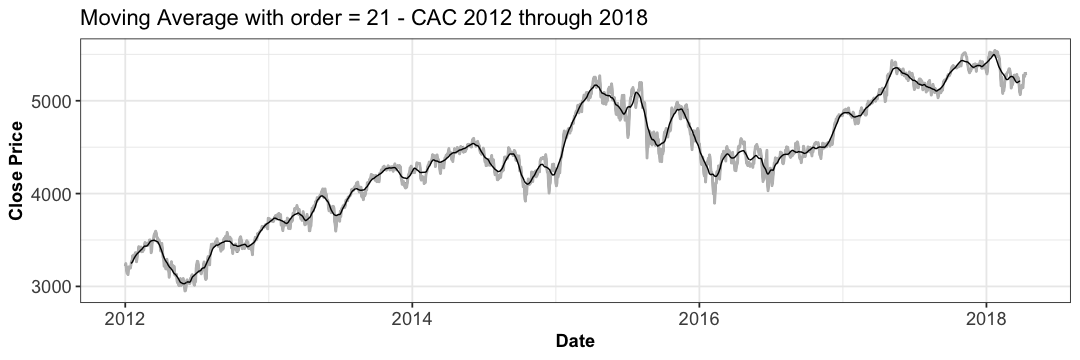

In [19]:
serie %>% 
        autoplot(col='grey') +
        geom_line(data=serie,col="grey",size=0.8)+
        geom_line(data=serie_ma30,col='black',lty=1,size=0.4)+
        theme_bw(base_size=11)+
        theme(axis.text=element_text(size=11),
              axis.title=element_text(size=11,face="bold"))+
        labs(x = "Date", y = "Close Price",title = "Moving Average with order = 21 - CAC 2012 through 2018")

Warning message:
“Removed 256 rows containing missing values (geom_path).”

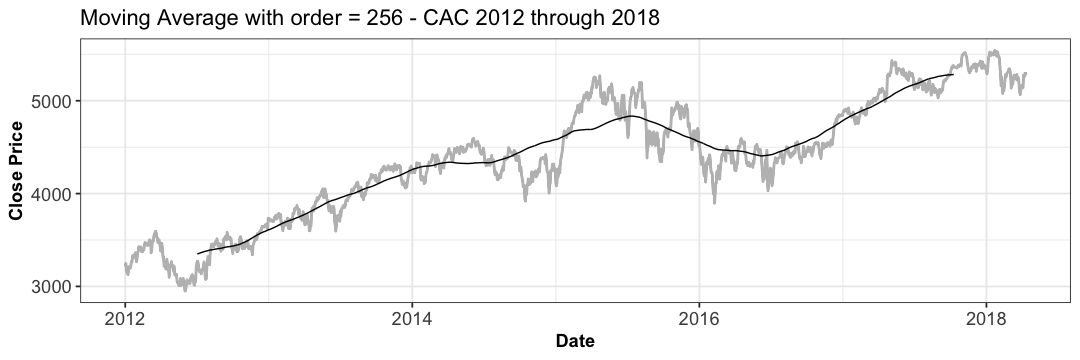

In [20]:
serie %>% 
        autoplot(col='grey') +
        geom_line(data=serie,col="grey",size=0.8)+
        geom_line(data=serie_ma256,col='black',lty=1,size=0.4)+
        theme_bw(base_size=11)+
        theme(axis.text=element_text(size=11),
              axis.title=element_text(size=11,face="bold"))+
        labs(x = "Date", y = "Close Price",title = "Moving Average with order = 256 - CAC 2012 through 2018")

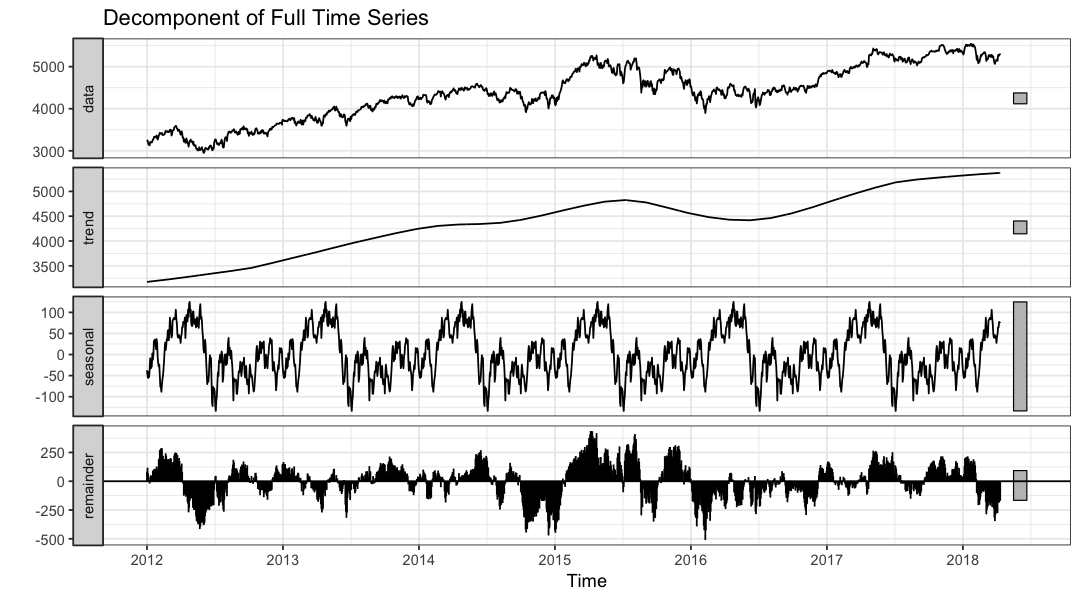

In [21]:
#break into components
#plot by ggplot2
options(repr.plot.width = 9, repr.plot.height = 5)
serie %>% stl(s.window='periodic') %>% autoplot() + theme_bw(base_size=11) + 
                                        ggtitle("Decomponent of Full Time Series")

In [22]:
library(tseries)

In [23]:
price = datad$Close
day = datad$Date[datad$Date > '2012-01-01']
serie = ts(price, start=c(2012, 1), end = c(2016, 256), frequency=256)
lserie = log(serie)
adf.test(lserie, alternative = c("stationary","explosive"))


	Augmented Dickey-Fuller Test

data:  lserie
Dickey-Fuller = -2.5076, Lag order = 10, p-value = 0.3634
alternative hypothesis: stationary


In [24]:
decomp = stl(lserie, s.window="periodic")
seasonal_stl   <- decomp$time.series[,1]
trend_stl     <- decomp$time.series[,2]
random_stl  <- decomp$time.series[,3]
deseasonal <- seasadj(decomp)

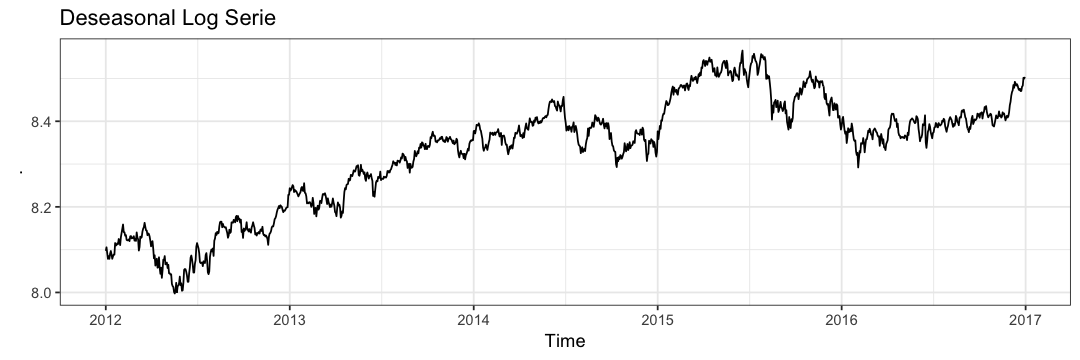

In [25]:
options(repr.plot.width = 9, repr.plot.height = 3)
deseasonal %>% autoplot()+
theme_bw(base_size=11)+
ggtitle("Deseasonal Log Serie")

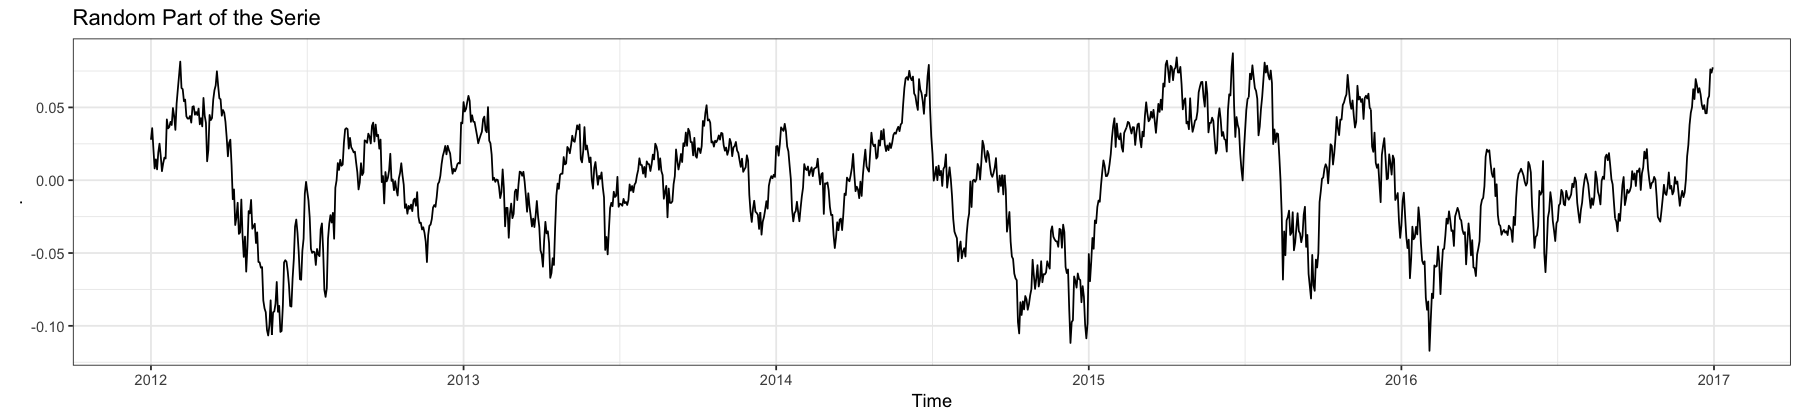

In [26]:
options(repr.plot.width = 15, repr.plot.height = 3.5)
random_stl %>% autoplot()+
theme_bw(base_size=11)+
ggtitle("Random Part of the Serie")

In [27]:
# Test stationarity
adf.test(random_stl, alternative = c("stationary","explosive"))

Warning message in adf.test(random_stl, alternative = c("stationary", "explosive")):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  random_stl
Dickey-Fuller = -4.4514, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [29]:
library(TSA)


Attaching package: ‘TSA’

The following object is masked from ‘package:readr’:

    spec

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar



In [30]:
# Theoretical EACF Table For an ARMA(p,q) Model 
m1=eacf(random_stl,6,12) # ARMA(1,0)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12
0 x x x x x x x x x x x  x  x 
1 o o x o x x o o o o o  o  o 
2 x o o o x x o o o o o  o  o 
3 x x o o x x o o o o o  o  o 
4 x x x o o x x x o o o  o  o 
5 x x x x o x o o o o o  o  o 
6 x x x x x x o o o o o  o  o 


<h2>Identification with AIC & BIC</h2>

In [31]:
# Build tables with AIC, BIC values
P = 0:7
Q = 0:7
try_arima = function(serie,T,P,Q,f) {
  options(warn=-1)
  M <- matrix(,nrow=length(P), ncol=length(Q),byrow=TRUE)
  colnames(M) <- paste("q =", Q)
  rownames(M) <- paste("p =", P)
 # f = match.fun(f)
  for (i in 1:length(P)) {
    for (j in 1:length(Q)) {
      M[i,j] = f(arima(serie, order=c(P[i],0,Q[j])))
    }
  }
  M <- as.table(M)
  options(warn=0)
  M
}

In [32]:
M_AIC = try_arima(random_stl,252,P,Q,AIC)
M_AIC

          q = 0     q = 1     q = 2     q = 3     q = 4     q = 5     q = 6
p = 0 -4663.050 -5956.074 -6675.836 -7041.741 -7375.061 -7509.821 -7595.880
p = 1 -7956.056 -7955.018 -7953.200 -7954.187 -7955.289 -7963.993 -7967.363
p = 2 -7955.005 -7953.072 -7952.094 -7952.759 -7951.573 -7965.143 -7967.512
p = 3 -7953.304 -7952.396 -7961.873 -7961.244 -7959.894 -7964.671 -7965.805
p = 4 -7955.051 -7953.458 -7961.332 -7959.371 -7960.121 -7962.767 -7960.667
p = 5 -7955.061 -7952.697 -7959.003 -7959.599 -7972.342 -7971.237 -7973.164
p = 6 -7965.151 -7965.741 -7964.712 -7963.150 -7971.495 -7970.179 -7968.482
p = 7 -7967.376 -7968.029 -7966.036 -7964.594 -7971.115 -7975.143 -7967.210
          q = 7
p = 0 -7672.402
p = 1 -7966.806
p = 2 -7965.795
p = 3 -7965.519
p = 4 -7961.823
p = 5 -7972.919
p = 6 -7968.623
p = 7 -7979.077

In [33]:
M_BIC = try_arima(random_stl,252,P,Q,BIC)
M_BIC

          q = 0     q = 1     q = 2     q = 3     q = 4     q = 5     q = 6
p = 0 -4652.740 -5940.610 -6655.217 -7015.968 -7344.134 -7473.738 -7554.643
p = 1 -7940.592 -7934.400 -7927.426 -7923.260 -7919.206 -7922.756 -7920.971
p = 2 -7934.387 -7927.299 -7921.167 -7916.676 -7910.336 -7918.752 -7915.965
p = 3 -7927.531 -7921.468 -7925.790 -7920.007 -7913.503 -7913.125 -7909.104
p = 4 -7924.124 -7917.376 -7920.095 -7912.980 -7908.575 -7906.066 -7898.811
p = 5 -7918.979 -7911.460 -7912.611 -7908.053 -7915.641 -7909.382 -7906.154
p = 6 -7923.914 -7919.350 -7913.166 -7906.449 -7909.640 -7903.169 -7896.318
p = 7 -7920.985 -7916.483 -7909.335 -7902.738 -7904.105 -7902.978 -7889.891
          q = 7
p = 0 -7626.010
p = 1 -7915.260
p = 2 -7909.095
p = 3 -7903.663
p = 4 -7894.813
p = 5 -7900.754
p = 6 -7891.304
p = 7 -7896.603

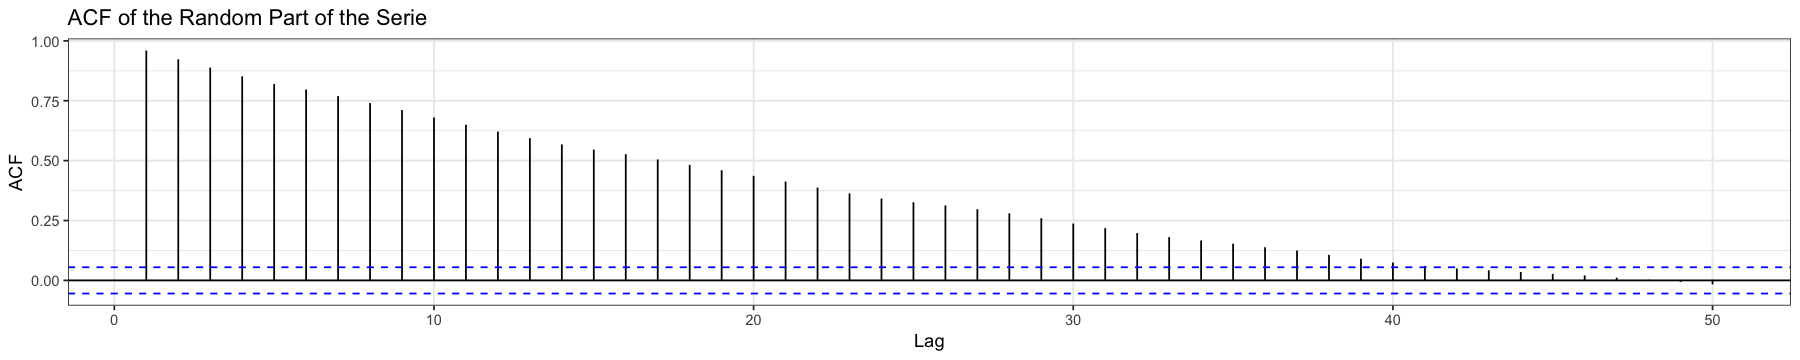

In [34]:
options(repr.plot.width = 15, repr.plot.height = 3)
random_stl %>% ggAcf(.,lag.max=50)+
theme_bw(base_size=11)+
ggtitle("ACF of the Random Part of the Serie")

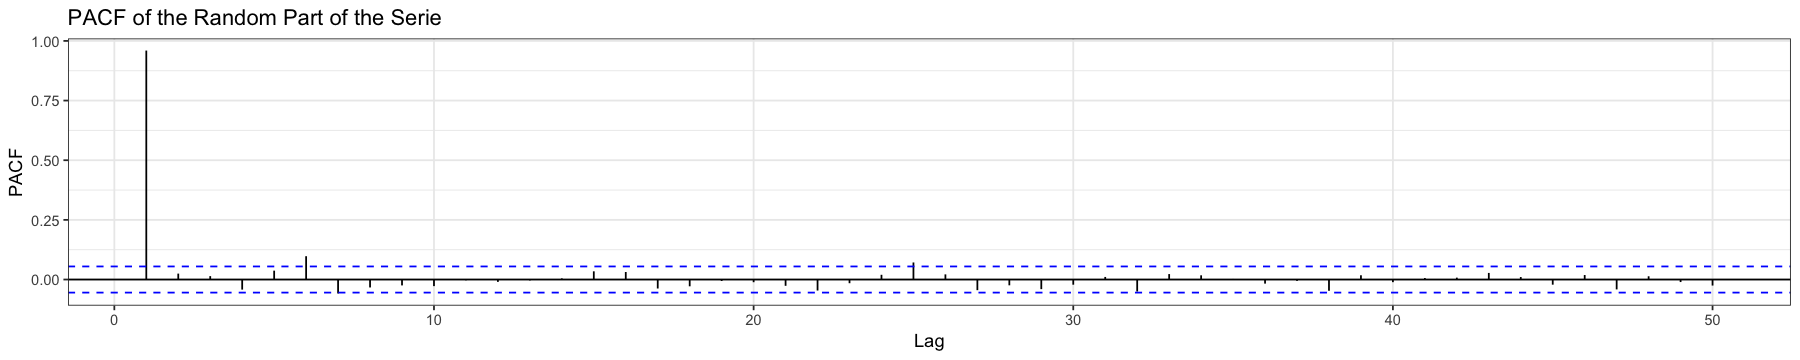

In [35]:
options(repr.plot.width = 15, repr.plot.height = 3)
random_stl %>% ggPacf(.,lag.max=50)+
theme_bw(base_size=11)+
ggtitle("PACF of the Random Part of the Serie")

In [36]:
fit1 = arima(random_stl, order=c(1,0,0), seasonal=c(0,0,0))
fit1


Call:
arima(x = random_stl, order = c(1, 0, 0), seasonal = c(0, 0, 0))

Coefficients:
         ar1  intercept
      0.9621     0.0022
s.e.  0.0076     0.0078

sigma^2 estimated as 0.0001162:  log likelihood = 3981.03,  aic = -7958.06

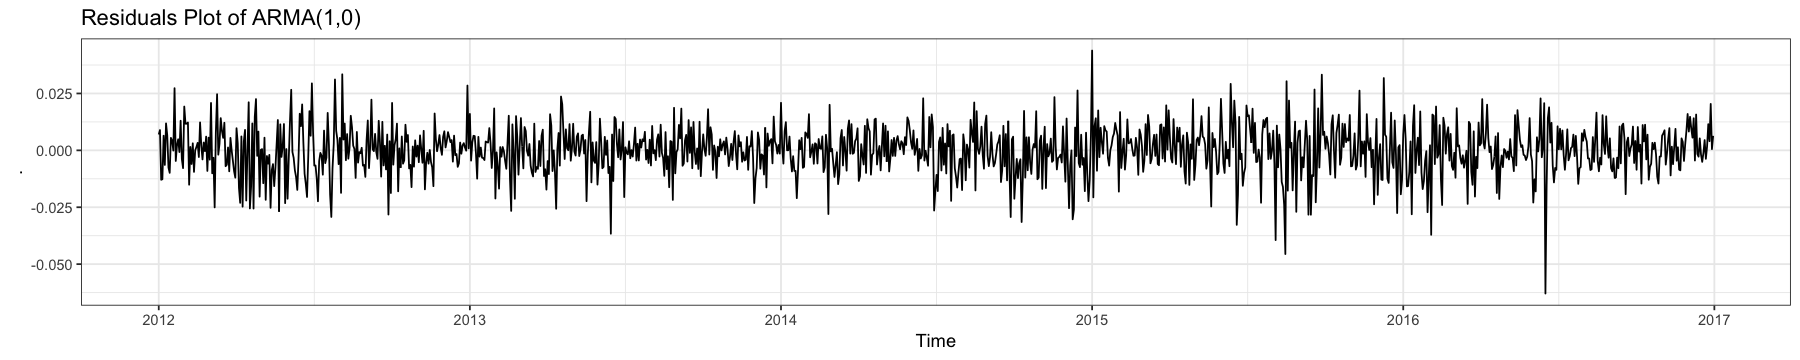

In [37]:
options(repr.plot.width = 15, repr.plot.height = 3)
fit1$residuals %>% autoplot()+
theme_bw(base_size=11)+
ggtitle("Residuals Plot of ARMA(1,0)")

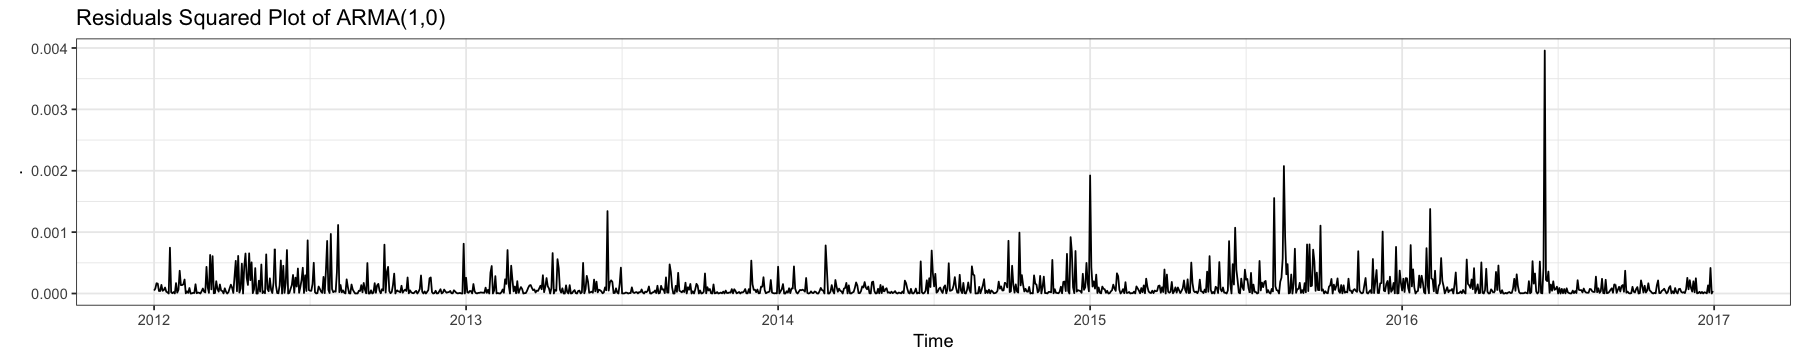

In [38]:
options(repr.plot.width = 15, repr.plot.height = 3)
fit1$residuals^2 %>% autoplot()+
theme_bw(base_size=11)+
ggtitle("Residuals Squared Plot of ARMA(1,0)")

In [39]:
shapiro.test(fit1$residuals)


	Shapiro-Wilk normality test

data:  fit1$residuals
W = 0.98495, p-value = 2.991e-10


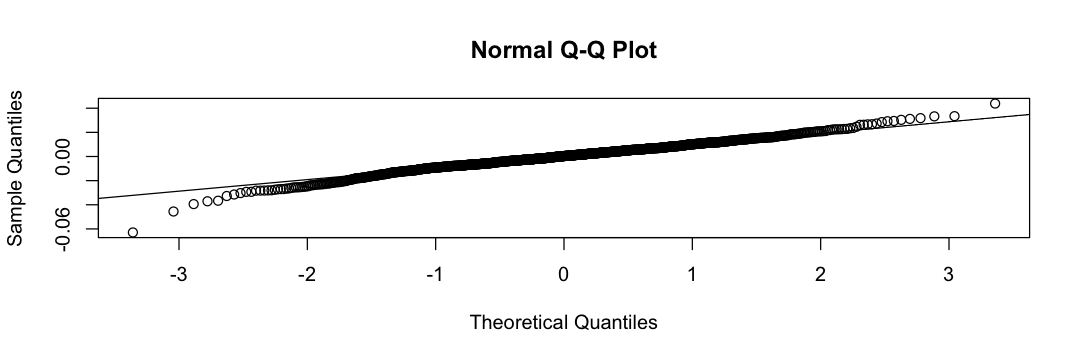

In [40]:
options(repr.plot.width = 9, repr.plot.height = 3)
qqnorm(fit1$residuals)
qqline(fit1$residuals)

In [41]:
library(LambertW)
ks.test.t(fit1$residuals)

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

This is 'LambertW' version 0.6.4.  Please see the NEWS file and citation("LambertW").


Attaching package: ‘LambertW’

The following objects are masked from ‘package:TSA’:

    kurtosis, skewness




	One-sample Kolmogorov-Smirnov test student-t with df=7.42, location=0,
	scale=0.01

data:  fit1$residuals
D = 0.015544, p-value = 0.9166
alternative hypothesis: two-sided


Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some



[1] 1142  928

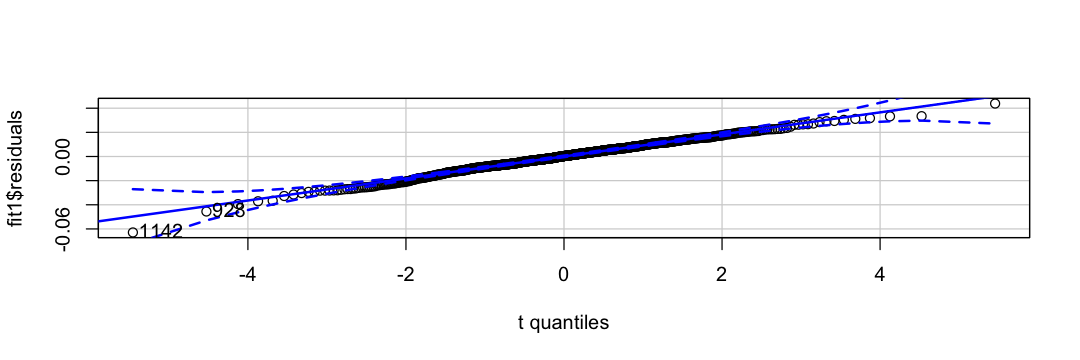

In [42]:
library(car)
qqPlot(fit1$residuals, distribution="t",df=7.42,col=1)

In [43]:
Box.test(fit1$residuals,type="Ljung",lag=50)


	Box-Ljung test

data:  fit1$residuals
X-squared = 73.912, df = 50, p-value = 0.01559


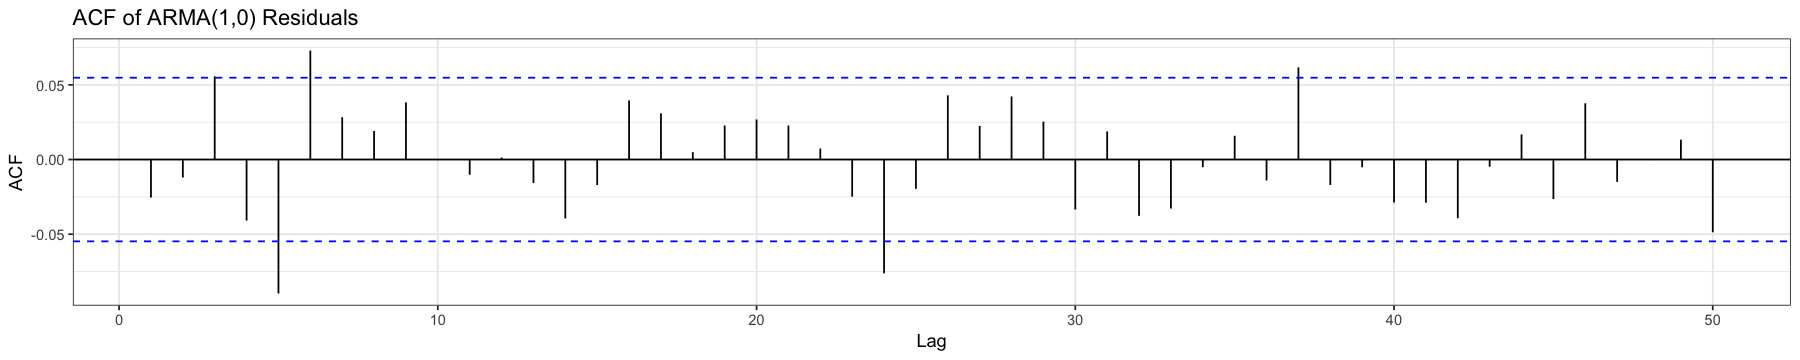

In [44]:
options(repr.plot.width = 15, repr.plot.height = 3)
fit1$residuals %>% ggAcf(.,lag.max=50)+
theme_bw(base_size=11)+
ggtitle("ACF of ARMA(1,0) Residuals")

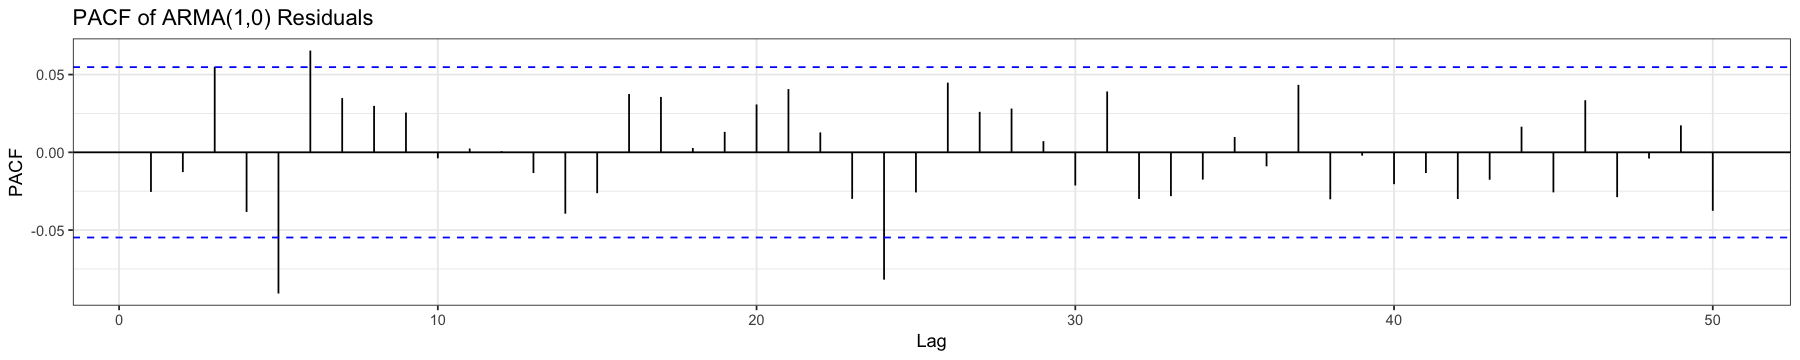

In [45]:
options(repr.plot.width = 15, repr.plot.height = 3)
fit1$residuals %>% ggPacf(.,lag.max=50)+
theme_bw(base_size=11)+
ggtitle("PACF of ARMA(1,0) Residuals")

In [46]:
library(aTSA)


Attaching package: ‘aTSA’

The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test

The following object is masked from ‘package:forecast’:

    forecast

The following object is masked from ‘package:graphics’:

    identify



ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ  p.value
[1,]     4 33.8 8.25e-07
[2,]     8 51.7 1.95e-08
[3,]    12 64.9 2.89e-09
[4,]    16 69.1 1.43e-08
[5,]    20 77.2 1.19e-08
[6,]    24 83.7 1.57e-08
Lagrange-Multiplier test: 
     order  LM  p.value
[1,]     4 755 0.00e+00
[2,]     8 373 0.00e+00
[3,]    12 232 0.00e+00
[4,]    16 172 0.00e+00
[5,]    20 132 0.00e+00
[6,]    24 108 5.45e-13


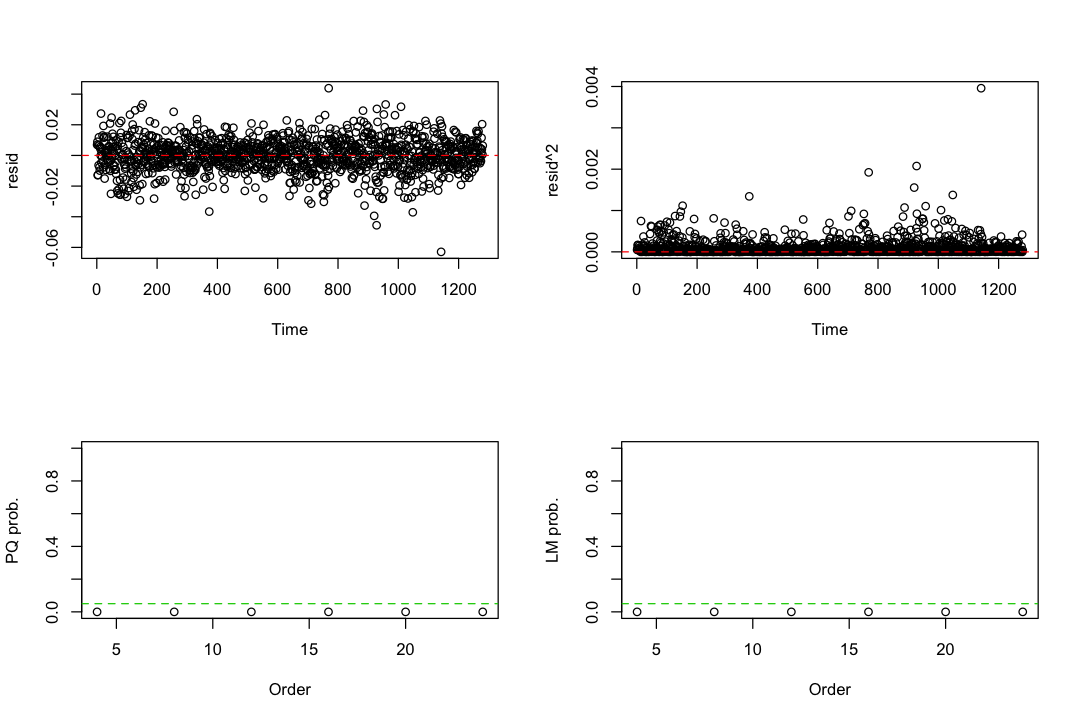

In [47]:
options(repr.plot.width = 9, repr.plot.height = 6)
arch.test(fit1,output=TRUE)

In [48]:
library(fGarch)

Loading required package: timeDate

Attaching package: ‘timeDate’

The following objects are masked from ‘package:LambertW’:

    kurtosis, skewness

The following objects are masked from ‘package:TSA’:

    kurtosis, skewness

Loading required package: timeSeries
Loading required package: fBasics

Attaching package: ‘fBasics’

The following object is masked from ‘package:car’:

    densityPlot



In [49]:
ResultarmAIC=data.frame(Model="m",AIC=0)#,BIC=0)#,SIC=0,HQIC=0)#,MAPE=0,RMSE=0)
options( warn = -1 )
q=0
for (i in 1:7){
  for (j in 1:7){
    #q=q+1
    fit=garchFit(formula=substitute(~arma(1,0)+garch(p,q),list(p=i,q=j)),data=fit1$residuals,cond.dist="std",trace=F)
                 
      ResultarmAIC=rbind(ResultarmAIC,
                      data.frame(Model=paste("m",i,",",j),
                                 AIC=fit@fit$ics[1]
                                )
                     )
  }
}

In [50]:
ResultarmAIC=ResultarmAIC[2:nrow(ResultarmAIC),]

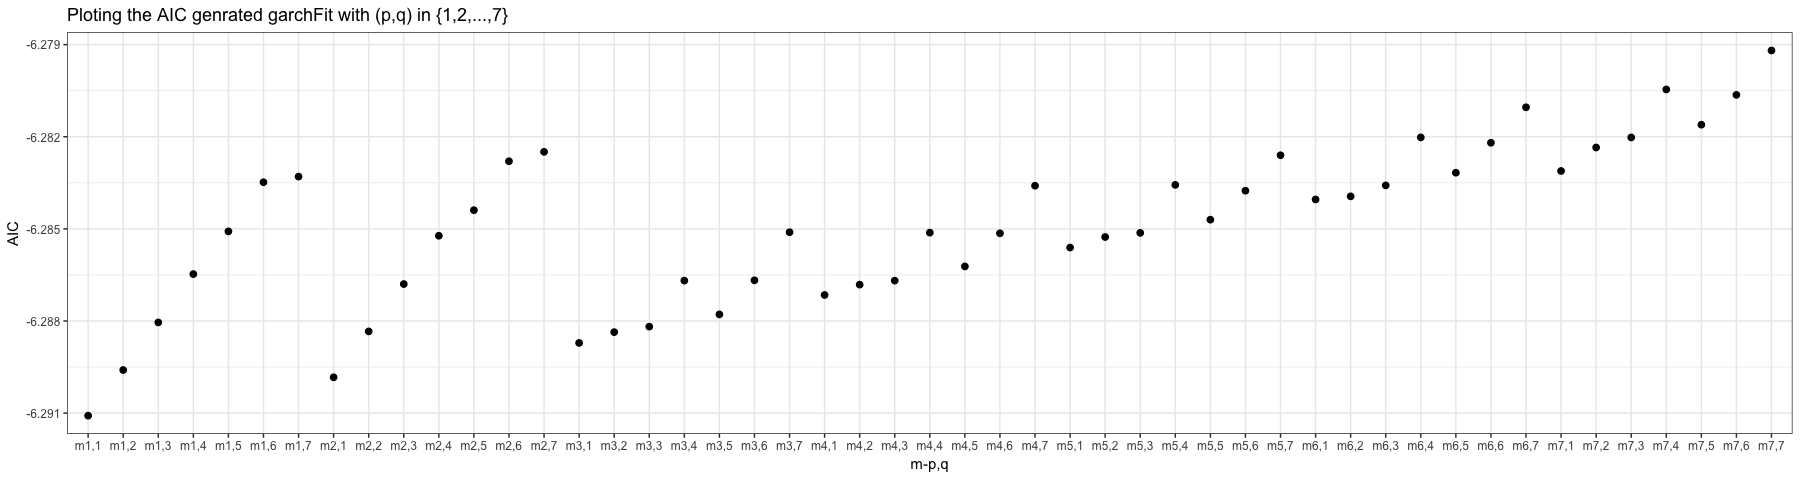

In [51]:
options(repr.plot.width = 15, repr.plot.height = 4)
ResultarmAIC %>% ggplot(.,aes(x=Model,y=AIC))+
  geom_point()+
theme_bw(base_size=9)+
scale_x_discrete(labels = abbreviate)+
xlab(label="m-p,q")+
ggtitle("Ploting the AIC genrated garchFit with (p,q) in {1,2,...,7}")

In [52]:
#based on the Resids variable - Residual of ARIMA model
ResultarmBIC=data.frame(Model="m",BIC=0)#,BIC=0)#,SIC=0,HQIC=0)#,MAPE=0,RMSE=0)
options( warn = -1 )
q=0
for (i in 1:7){
  for (j in 1:7){
    #q=q+1
    fit=garchFit(formula=substitute(~arma(1,0)+garch(p,q),list(p=i,q=j)),data=fit1$residuals,cond.dist="std",trace=F)
                 
      ResultarmBIC=rbind(ResultarmBIC,
                      data.frame(Model=paste("m",i,",",j),
                                 BIC=fit@fit$ics[2]
                                )
                     )
  }
}

In [53]:
ResultarmBIC=ResultarmBIC[2:nrow(ResultarmBIC),]

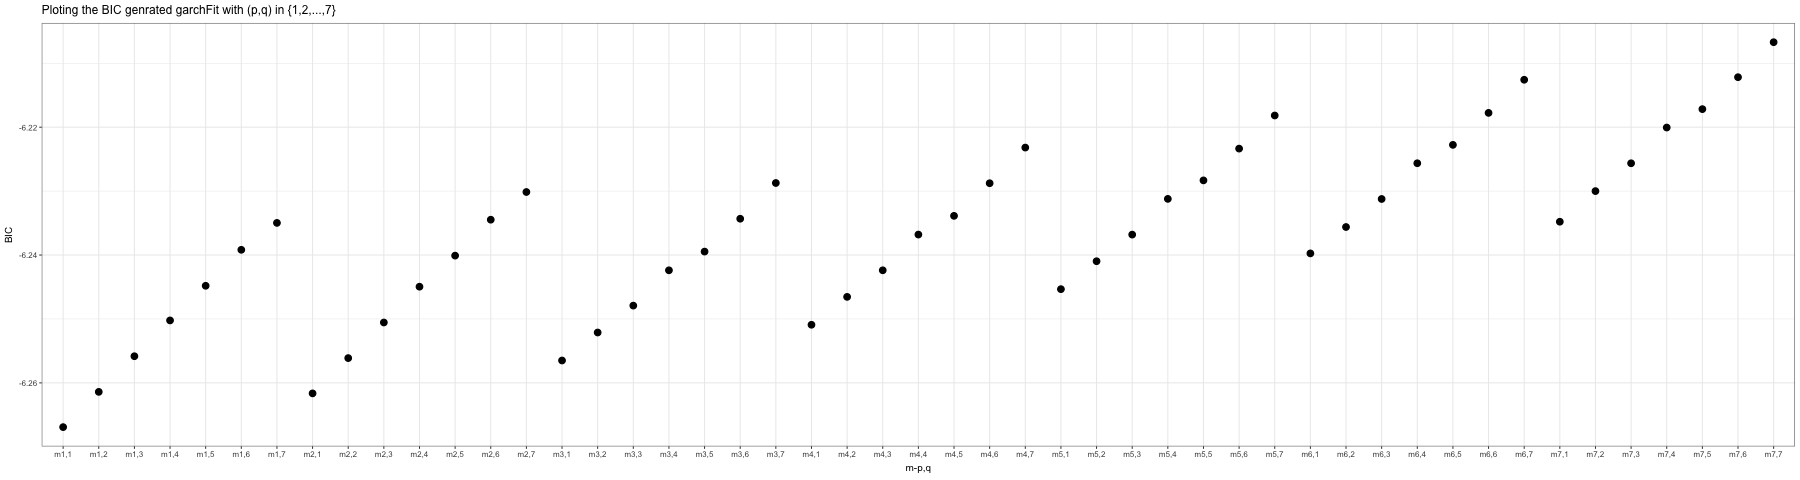

In [54]:
options(repr.plot.width = 15, repr.plot.height = 4)
ResultarmBIC %>% ggplot(.,aes(x=Model,y=BIC))+
  geom_point()+
theme_bw(base_size=6)+
scale_x_discrete(labels = abbreviate)+
xlab(label="m-p,q")+
ggtitle("Ploting the BIC genrated garchFit with (p,q) in {1,2,...,7}")

In [55]:
#based on the Resids variable - Residual of ARIMA model
Resultarm=data.frame(Model="m",AIC=0,BIC=0)#,SIC=0,HQIC=0)#,MAPE=0,RMSE=0)
options( warn = -1 )
q=0
for (i in 1:9){
  for (j in 1:9){
    #q=q+1
    fit=garchFit(formula=substitute(~arma(1,0)+garch(p,q),list(p=i,q=j)),data=fit1$residuals,cond.dist="std",trace=F)
                 
      Resultarm=rbind(Resultarm,
                      data.frame(Model=paste("m-",i,"-",j),
                                 AIC=fit@fit$ics[1],
                                 BIC=fit@fit$ics[2]
                                )
                     )
  }
}

In [56]:
Resultarm=Resultarm[2:nrow(Resultarm),]

In [57]:
print("AIC"); Resultarm[which.min(Resultarm$AIC),]
print("BIC"); Resultarm[which.min(Resultarm$BIC),]

[1] "AIC"


,Model,AIC,BIC
AIC,m- 1 - 1,-6.291084,-6.266921


[1] "BIC"


,Model,AIC,BIC
AIC,m- 1 - 1,-6.291084,-6.266921


In [58]:
fGARCHfitfull=garchFit(formula=(~arma(1,0)+garch(1,1)), data=fit1$residuals,trace=F,cond.dist="std")
summary(fGARCHfitfull)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = (~arma(1, 0) + garch(1, 1)), data = fit1$residuals, 
    cond.dist = "std", trace = F) 

Mean and Variance Equation:
 data ~ arma(1, 0) + garch(1, 1)
<environment: 0x7fbca1bbee78>
 [data = fit1$residuals]

Conditional Distribution:
 std 

Coefficient(s):
         mu          ar1        omega       alpha1        beta1        shape  
 3.3544e-04  -3.1853e-02   5.1781e-06   6.8382e-02   8.8838e-01   7.7848e+00  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      3.354e-04   2.736e-04    1.226  0.22017    
ar1    -3.185e-02   2.848e-02   -1.119  0.26332    
omega   5.178e-06   2.807e-06    1.844  0.06513 .  
alpha1  6.838e-02   2.227e-02    3.071  0.00214 ** 
beta1   8.884e-01   4.063e-02   21.865  < 2e-16 ***
shape   7.785e+00   1.574e+00    4.946 7.59e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 4032.293    normalized:  3.150229 


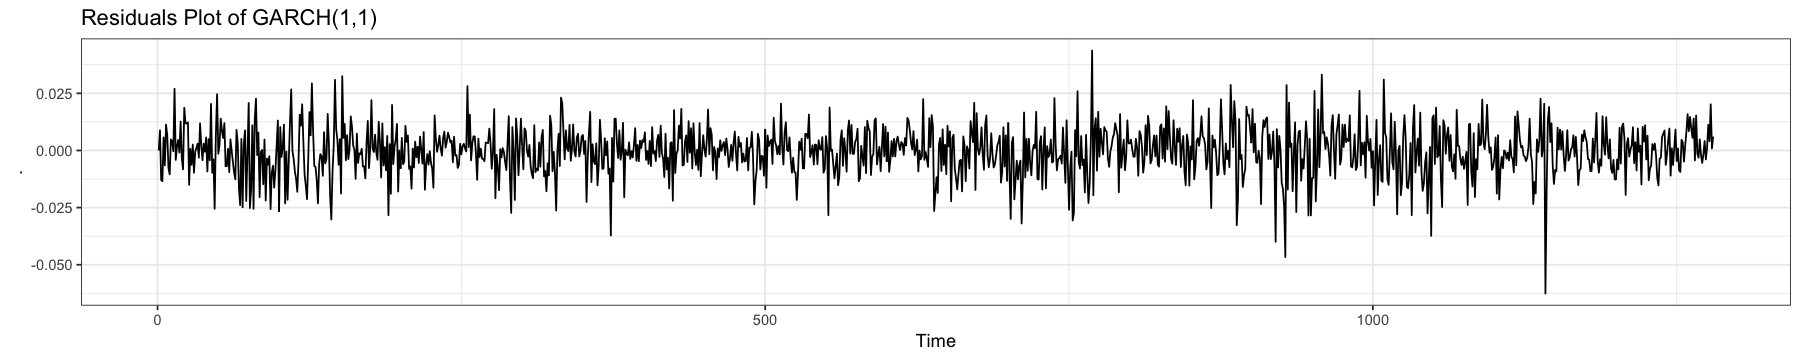

In [59]:
options(repr.plot.width = 15, repr.plot.height = 3)
ts(fGARCHfitfull@residuals) %>% autoplot()+
theme_bw(base_size=11)+
ggtitle("Residuals Plot of GARCH(1,1)")

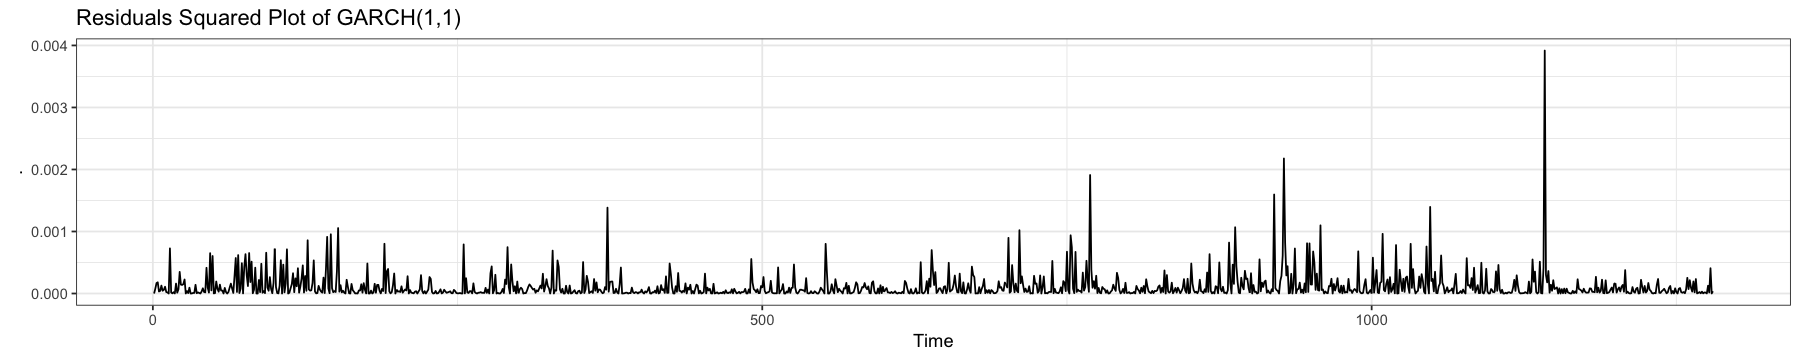

In [60]:
options(repr.plot.width = 15, repr.plot.height = 3)
ts(fGARCHfitfull@residuals^2) %>% autoplot()+
theme_bw(base_size=11)+
ggtitle("Residuals Squared Plot of GARCH(1,1)")